Saving Screenshot 2025-04-15 013737.png to Screenshot 2025-04-15 013737.png


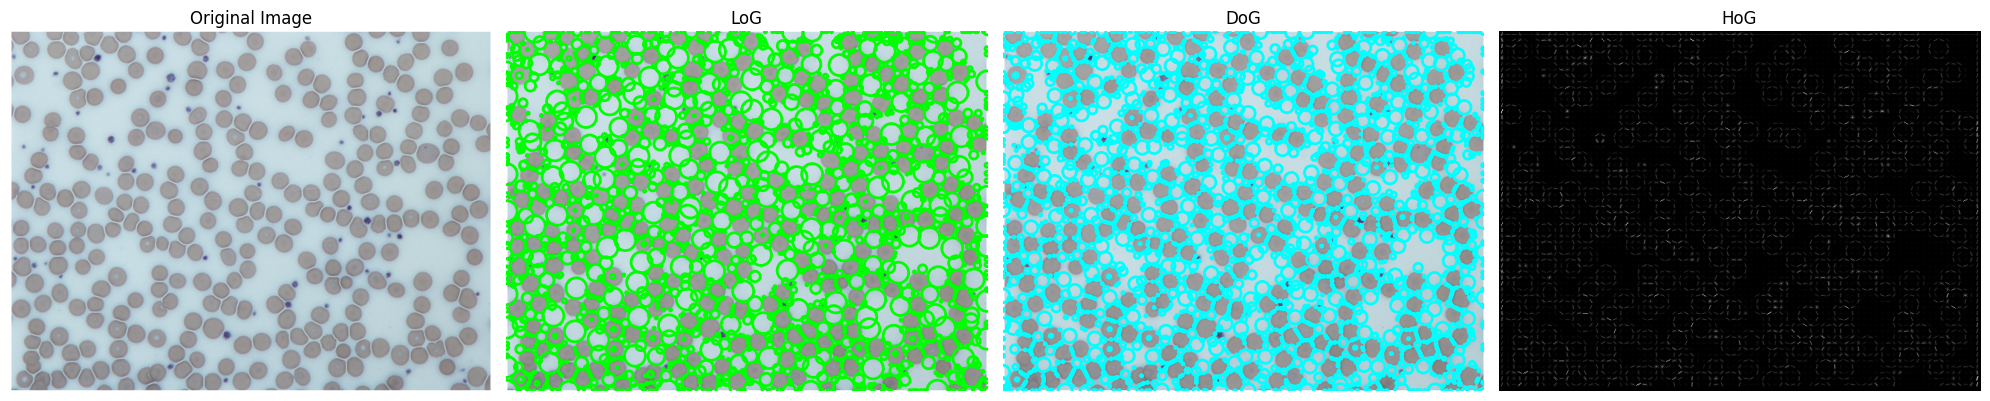

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, hog
from skimage.color import rgb2gray
from skimage.io import imread

# Upload your microscope image (platelets)
from google.colab import files
uploaded = files.upload()

# Load image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = rgb2gray(img_rgb)

# LoG
blobs_log = blob_log(gray, max_sigma=10, num_sigma=10, threshold=0.02)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# DoG
blobs_dog = blob_dog(gray, max_sigma=10, threshold=0.02)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

# HoG
fd, hog_image = hog(gray, visualize=True)

# Plot results
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(img_rgb)
for y, x, r in blobs_log:
    axs[1].add_patch(plt.Circle((x, y), r, color='lime', linewidth=2, fill=False))
axs[1].set_title("LoG")
axs[1].axis('off')

axs[2].imshow(img_rgb)
for y, x, r in blobs_dog:
    axs[2].add_patch(plt.Circle((x, y), r, color='cyan', linewidth=2, fill=False))
axs[2].set_title("DoG")
axs[2].axis('off')

axs[3].imshow(hog_image, cmap='gray')
axs[3].set_title("HoG")
axs[3].axis('off')

plt.tight_layout()
plt.show()


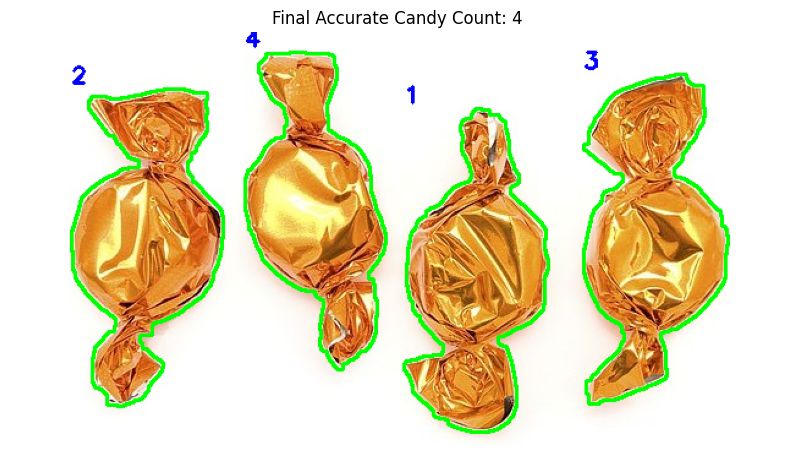

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/cdy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Improve contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Dilation and closing to form complete contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
edges = cv2.dilate(edges, kernel, iterations=2)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area
filtered = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 1000 < area < 30000:
        filtered.append(cnt)

# Draw contours
output = img.copy()
for i, cnt in enumerate(filtered):
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.putText(output, str(i + 1), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Show result
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Final Accurate Candy Count: {len(filtered)}")
plt.axis('off')
plt.show()


In [ ]:
# Completely remove old OpenCV version and reinstall contrib version
!pip uninstall -y opencv-python opencv-python-headless
!pip install opencv-contrib-python --upgrade --quiet

# Now restart runtime after this cell runs


Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86
Found existing installation: opencv-python-headless 4.11.0.86
Uninstalling opencv-python-headless-4.11.0.86:
  Successfully uninstalled opencv-python-headless-4.11.0.86


Saving Screenshot 2025-04-15 022411.png to Screenshot 2025-04-15 022411 (6).png


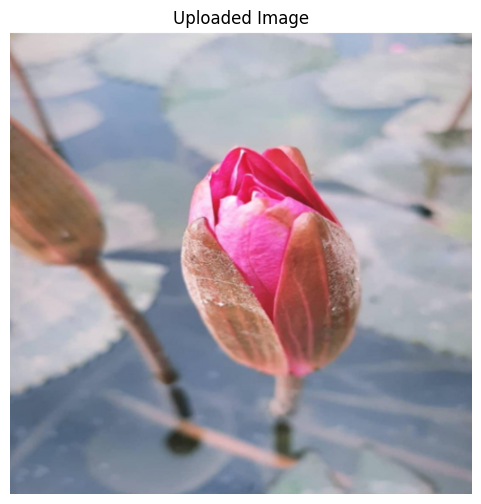

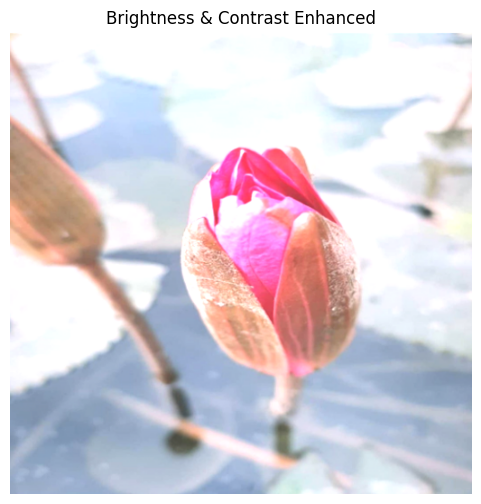

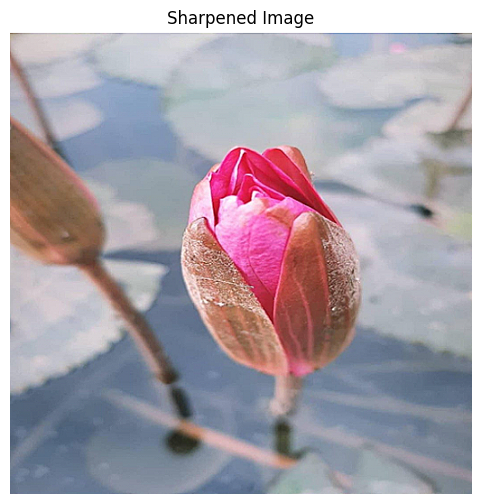

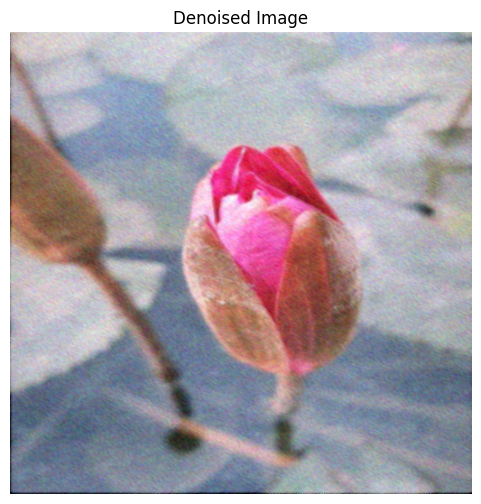

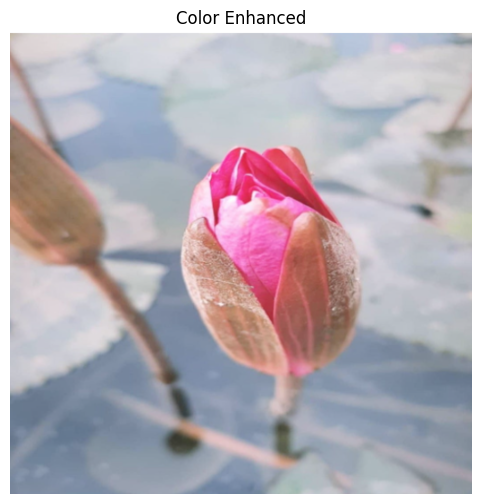

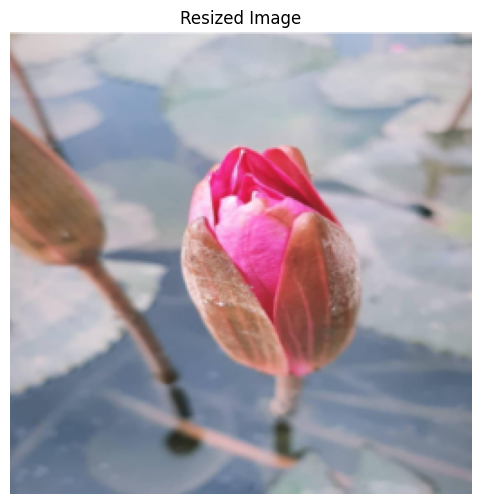

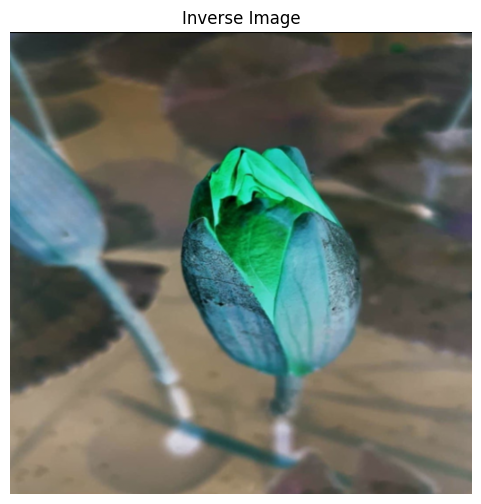

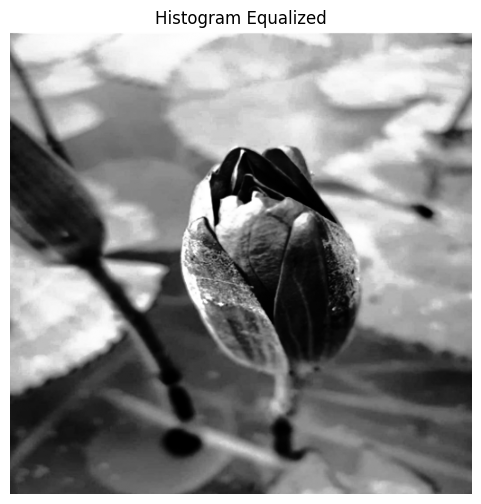

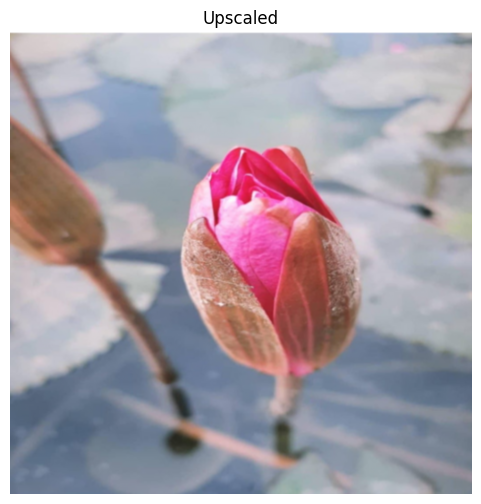

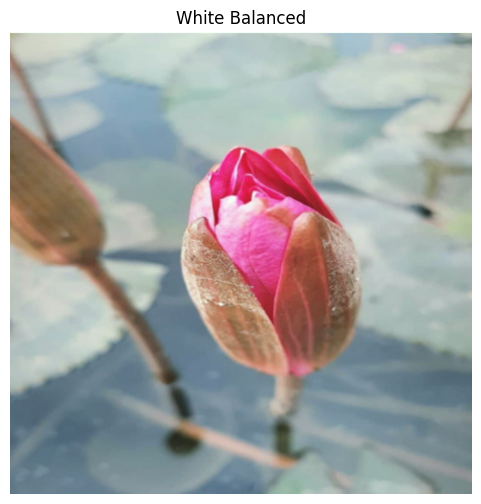

In [ ]:
# INSTALL opencv-contrib-python
!pip install opencv-contrib-python --upgrade --quiet

import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap_type=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

from google.colab import files
from skimage.io import imread
from skimage.transform import resize
import numpy as np

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = imread(img_path)

# Convert RGBA to RGB if necessary
if img.shape[-1] == 4:
    img = img[..., :3]

# Resize image if too large
if img.shape[0] > 512 or img.shape[1] > 512:
    img = resize(img, (512, 512), anti_aliasing=True)

show_image(img, "Uploaded Image")

# STEP 2 - Image Enhancement Techniques
from skimage import exposure, restoration, transform
from skimage.color import rgb2gray
import cv2

# 1. Brightness/Contrast
bright_contrast = cv2.convertScaleAbs((img * 255).astype(np.uint8), alpha=1.2, beta=30)
show_image(bright_contrast, "Brightness & Contrast Enhanced")

# 2. Sharpening
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D((img * 255).astype(np.uint8), -1, kernel)
show_image(sharpened, "Sharpened Image")

# 3. Denoising
noisy_img = img + 0.1 * np.random.randn(*img.shape)
denoised = restoration.denoise_bilateral(noisy_img, channel_axis=-1)
show_image(denoised, "Denoised Image")

# 4. Color Enhancement (Gamma)
enhanced_color = exposure.adjust_gamma(img, 0.8)
show_image(enhanced_color, "Color Enhanced")

# 5. Resize / Scale
resized = transform.resize(img, (img.shape[0] // 2, img.shape[1] // 2), anti_aliasing=True)
show_image(resized, "Resized Image")

# 6. Inverse Transform
inverse = 1.0 - img  # since image is normalized 0-1
show_image(inverse, "Inverse Image")

# 7. Histogram Equalization
gray = rgb2gray(img)
equalized = exposure.equalize_hist(gray)
show_image(equalized, "Histogram Equalized", cmap_type='gray')

# 8. Super Resolution (Upscale Placeholder)
sr_image = transform.rescale(img, 2.0, channel_axis=-1, anti_aliasing=True)
show_image(sr_image, "Upscaled")

# 9. Color Correction (White Balance)
# 9. Color Correction (White Balance - Manual Gray World Method)
def gray_world_white_balance(img):
    img = img.astype(np.float32)
    avgR = np.mean(img[..., 0])
    avgG = np.mean(img[..., 1])
    avgB = np.mean(img[..., 2])
    avgGray = (avgR + avgG + avgB) / 3

    img[..., 0] = np.clip(img[..., 0] * (avgGray / avgR), 0, 255)
    img[..., 1] = np.clip(img[..., 1] * (avgGray / avgG), 0, 255)
    img[..., 2] = np.clip(img[..., 2] * (avgGray / avgB), 0, 255)

    return img.astype(np.uint8)

wb_img = gray_world_white_balance((img * 255))
show_image(wb_img, "White Balanced")



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import time

# ---- Device Setup ----
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ---- CIFAR-100 Transforms ----
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ---- Load CIFAR-100 Dataset ----
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# ---- Load Pretrained Models ----
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)

# Modify final classifier for 100 classes
alexnet.classifier[6] = nn.Linear(4096, 100)
vgg16.classifier[6] = nn.Linear(4096, 100)

alexnet.to(device)
vgg16.to(device)

# ---- Loss and Optimizer ----
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.0001)
optimizer_vgg = optim.Adam(vgg16.parameters(), lr=0.0001)

# ---- Training Function ----
def train_model(model, optimizer, name, epochs=3):
    model.train()
    start = time.time()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        acc = 100. * correct / total
        print(f"{name} | Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}, Accuracy: {acc:.2f}%")

    duration = time.time() - start
    print(f"{name} training time: {duration:.2f} seconds\n")

# ---- Evaluation Function ----
def evaluate_model(model, name):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    acc = 100. * correct / total
    print(f"{name} Test Accuracy: {acc:.2f}%")

# ---- Run Training and Evaluation ----
train_model(alexnet, optimizer_alex, "AlexNet")
evaluate_model(alexnet, "AlexNet")

train_model(vgg16, optimizer_vgg, "VGG16")
evaluate_model(vgg16, "VGG16")


Using device: cpu


100%|██████████| 169M/169M [00:10<00:00, 15.9MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 117MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'we

AlexNet | Epoch 1, Loss: 1.9166, Accuracy: 48.22%
AlexNet | Epoch 2, Loss: 1.1319, Accuracy: 66.64%
